In [209]:
import os
import numpy as np
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from collections import defaultdict
from imageio import imread
from scipy.ndimage.filters import sobel
import cv2

(47, 40)


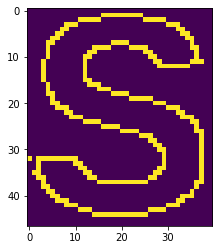

In [210]:
# Read image and detect edges
img = cv2.imread('s.png', cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(5,5),0)
img = cv2.Canny(img, 50,50)
print(img.shape)
plt.imshow(img)

In [211]:
# set centroid
xc,yc = img.shape[1]/2,img.shape[0]/2

# calculate gradient
dx = sobel(img, axis=0, mode='constant')
dy = sobel(img, axis=1, mode='constant')
gradient = np.arctan2(dy,dx) * 180 / np.pi

# create R-table
r_table = defaultdict(list)
for i in range(gradient.shape[0]):
    for j in range(gradient.shape[1]):
        if gradient[i,j]>0:
            r_table[gradient[i,j]].append([j-xc,i-yc])

(400, 640)


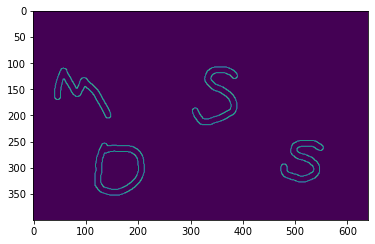

In [212]:
# read test image and detect edges
img_test = cv2.imread('s_test.png', cv2.COLOR_BGR2GRAY)
img_test = cv2.GaussianBlur(img_test,(5,5),0)
img_test = cv2.Canny(img_test, 50,50)
print(img_test.shape)
plt.imshow(img_test)

In [213]:
# create accumulator for test image
acc = np.zeros((img_test.shape[0],img_test.shape[1]))

# calculate gradients for test image
dx = sobel(img_test, axis=0, mode='constant')
dy = sobel(img_test, axis=1, mode='constant')
gradient = np.arctan2(dy,dx) * 180 / np.pi

# updating accumulator from R-table
for i in range(gradient.shape[0]):
    for j in range(gradient.shape[1]):
        for k in r_table[gradient[i,j]]:
            x_c = j-k[0]
            y_c = i-k[1]
            if x_c<acc.shape[1] and y_c<acc.shape[0]:
                acc[int(y_c),int(x_c)] +=1

In [214]:
# generate centriods for top 3 patterns in test image
a_1=acc.ravel()
arr_max = []
for x in np.argsort(a_1)[::-1][:3]:
    rw= int(x/acc.shape[1])
    col = x%acc.shape[1]
    arr_max.append([rw,col,a_1[x]])

arr_max 

[[141, 356, 61.0], [140, 357, 54.0], [297, 530, 54.0]]

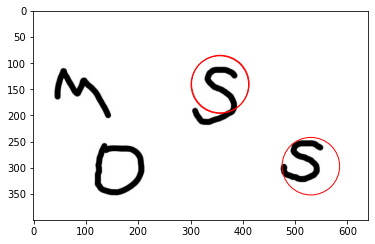

In [215]:
# identify patterns in test image
img_test = cv2.imread('s_test.png')
fig, ax = plt.subplots()
ax.imshow(img_test)
for i in range(0,len(arr_max)):
    circle= Circle((arr_max[i][1],arr_max[i][0]),55, color='red',fill=False)
    ax.add_patch(circle)